In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [8]:
all_sits_goal_data = pd.read_csv('all_sits_player_goal_data.csv')

In [105]:
all_sits_goal_data[all_sits_goal_data.player_upper == 'SIDNEY.CROSBY']

,player,player_upper,api_id,birthday,season_age,position,position_type,shoots,team,season,session,gp,toi,toi_gp,toi_perc,g,a1,a2,points,isf,iff,icf
814,Sidney Crosby,SIDNEY.CROSBY,8471675,1987-08-07,20.0,C,F,L,PIT,20072008,R,53.0,1104.78,20.84,34.26,24.0,33.0,15.0,72.0,173.0,233.0,280.0
1755,Sidney Crosby,SIDNEY.CROSBY,8471675,1987-08-07,21.0,C,F,L,PIT,20082009,R,77.0,1690.08,21.95,35.90,33.0,51.0,19.0,103.0,238.0,319.0,388.0
2713,Sidney Crosby,SIDNEY.CROSBY,8471675,1987-08-07,22.0,C,F,L,PIT,20092010,R,80.0,1756.55,21.96,36.07,51.0,36.0,22.0,109.0,291.0,393.0,490.0
3680,Sidney Crosby,SIDNEY.CROSBY,8471675,1987-08-07,23.0,C,F,L,PIT,20102011,R,41.0,898.62,21.92,36.09,32.0,20.0,14.0,66.0,161.0,219.0,278.0
4639,Sidney Crosby,SIDNEY.CROSBY,8471675,1987-08-07,24.0,C,F,L,PIT,20112012,R,22.0,406.38,18.47,30.53,8.0,16.0,13.0,37.0,75.0,97.0,126.0
5545,Sidney Crosby,SIDNEY.CROSBY,8471675,1987-08-07,25.0,C,F,L,PIT,20122013,R,36.0,759.75,21.10,34.96,15.0,28.0,13.0,56.0,124.0,168.0,203.0
6487,Sidney Crosby,SIDNEY.CROSBY,8471675,1987-08-07,26.0,C,F,L,PIT,20132014,R,80.0,1757.78,21.97,36.19,36.0,34.0,34.0,104.0,259.0,344.0,421.0
7442,Sidney Crosby,SIDNEY.CROSBY,8471675,1987-08-07,27.0,C,F,L,PIT,20142015,R,77.0,1538.37,19.98,32.76,28.0,31.0,25.0,84.0,237.0,315.0,380.0
8419,Sidney Crosby,SIDNEY.CROSBY,8471675,1987-08-07,28.0,C,F,L,PIT,20152016,R,80.0,1637.55,20.47,33.66,36.0,28.0,21.0,85.0,248.0,342.0,446.0
9368,Sidney Crosby,SIDNEY.CROSBY,8471675,1987-08-07,29.0,C,F,L,PIT,20162017,R,75.0,1490.83,19.88,32.66,44.0,28.0,17.0,89.0,255.0,325.0,411.0


In [16]:
forwards_goal_data = all_sits_goal_data[all_sits_goal_data['position'] != 'D']
defense_goal_data = all_sits_goal_data[all_sits_goal_data['position'] == 'D']

In [48]:
print("Forwards TOI summary stats")
print(forwards_goal_data['toi'].describe())
print("Defense TOI summary stats")
print(defense_goal_data['toi'].describe())

Forwards TOI summary stats
count    8164.000000
mean      671.720061
std       512.604988
min         1.430000
25%       169.095000
50%       625.665000
75%      1113.372500
max      1991.280000
Name: toi, dtype: float64
Defense TOI summary stats
count    4243.000000
mean      863.717226
std       631.214286
min         0.750000
25%       257.620000
50%       831.120000
75%      1406.635000
max      2411.950000
Name: toi, dtype: float64


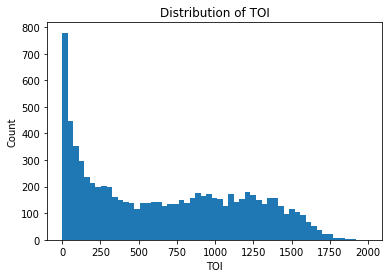

In [49]:
plt.hist(forwards_goal_data['toi'], bins=55)
plt.xlabel("TOI")
plt.ylabel("Count")
plt.title("Distribution of TOI")
plt.show()

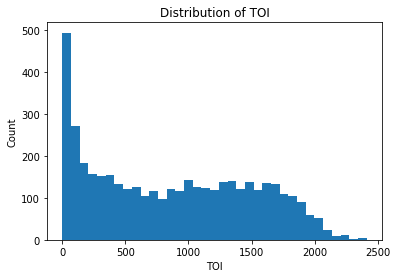

In [50]:
plt.hist(defense_goal_data['toi'], bins=35)
plt.xlabel("TOI")
plt.ylabel("Count")
plt.title("Distribution of TOI")
plt.show()

My hypothesis is that goals and points is a funtion of TOI. So I need to accurately model TOI in order model goals. So my first step will being building a TOI distribution posterior with a likelihood and prior

## Posible Distributions
* Dagum distribution
* exponential logarithmic distribution
* pareto to model the tail drop off 

In [51]:
shift_data = pd.read_csv('matt.csv')
shift_data['season'] = shift_data['GAME_ID'].astype(str).str.slice(stop=4)

In [103]:
shift_data = shift_data[shift_data.DURATION < 200]

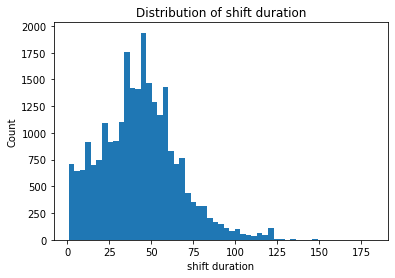

In [106]:
plt.hist(shift_data[shift_data.PLAYER_ID == 8471675]['DURATION'], bins=55)
plt.xlabel("shift duration")
plt.ylabel("Count")
plt.title("Distribution of shift duration")
plt.show()

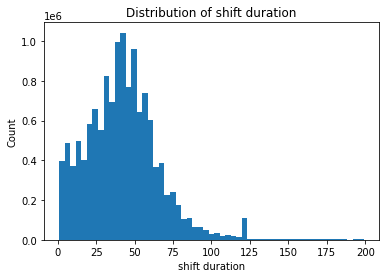

In [108]:
plt.hist(shift_data['DURATION'], bins=55)
plt.xlabel("shift duration")
plt.ylabel("Count")
plt.title("Distribution of shift duration")
plt.show()

In [89]:
shift_count = shift_data[['PLAYER_ID', 'season', 'DURATION']]\
              .groupby(['PLAYER_ID', 'season'], as_index=False)\
              .count().rename(columns={'DURATION': 'num_of_shifts'})

In [90]:
shift_count.head()

,PLAYER_ID,season,num_of_shifts
0,8445550,2009,2772
1,8445735,2009,1506
2,8446053,2009,112
3,8446485,2009,1653
4,8446485,2010,956


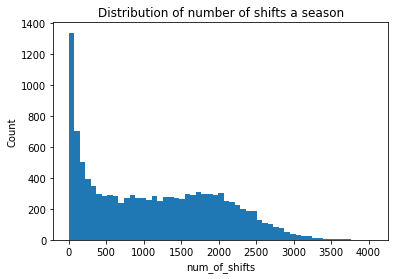

In [110]:
plt.hist(shift_count['num_of_shifts'], bins=55)
plt.xlabel("num_of_shifts")
plt.ylabel("Count")
plt.title("Distribution of number of shifts a season")
plt.show()

In [102]:
shift_data[(shift_data.PLAYER_ID == 8475178) & (shift_data.season == '2019')].DURATION.sum()/60

966.4666666666667

In [98]:
shift_data.GAME_ID.max()

2020030415

* Look at previous seasons goals correlation with current seasons shift count 